# Number and Precision
In this section we cover how numbers are (imperfectly) represented on computers, as well as the consequences of these representations.

We will see that the very act of attempting to represent the real world on a computer introduces unavoidable errors.

## What's wrong with this picture?

In [1]:
1e10 - 1e10 + 1e-10 == 1e10 + 1e-10 - 1e10

False

In [2]:
0.1 + 0.1 + 0.1 == 0.3

False

In [3]:
sum(10 * [0.1]) == 1.0

False

In [4]:
# Integer vs int
import numpy as np

x, two = np.int32(1), np.int32(2)
n = 0
while x > 0:
    print(f'2^{n} = {x}')
    n += 1
    x *= two
else:
    print(f'2^{n} = {x} ?')



2^0 = 1
2^1 = 2
2^2 = 4
2^3 = 8
2^4 = 16
2^5 = 32
2^6 = 64
2^7 = 128
2^8 = 256
2^9 = 512
2^10 = 1024
2^11 = 2048
2^12 = 4096
2^13 = 8192
2^14 = 16384
2^15 = 32768
2^16 = 65536
2^17 = 131072
2^18 = 262144
2^19 = 524288
2^20 = 1048576
2^21 = 2097152
2^22 = 4194304
2^23 = 8388608
2^24 = 16777216
2^25 = 33554432
2^26 = 67108864
2^27 = 134217728
2^28 = 268435456
2^29 = 536870912
2^30 = 1073741824
2^31 = -2147483648 ?


/var/folders/26/33gfkypd2f930_67mdqmxs8m0000gn/T/ipykernel_78304/789384739.py:9: RuntimeWarning: overflow encountered in scalar multiply
  x *= two


## Number Systems
### Decimal numbers
There are many numbers---uncountably many, in fact.
If a language were to assign to each number a unique word, that language would similarly have infinitely many words.
In China, a senior high-school student is expected to learn $\approx 6600$ characters, yet most can discuss numbers beyond $10000$.

Most advanced civilisations have relied upon number systems that represent numbers as some expansion of powers of some base.
For example, in Ancient Egypt, powers of ten from one to one million each had their own symbol (hieroglyph), with other numbers expressed by writing the appropriate number of copies of those basic symbols.
Such a system has the number ten as its base, and is referred to as a decimal number system.

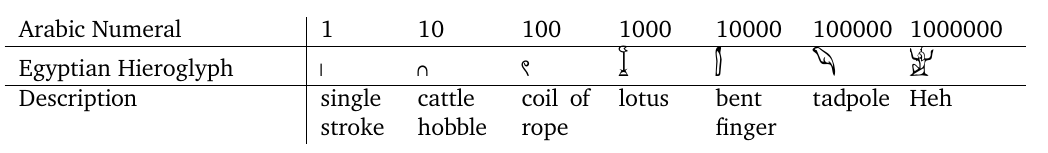

In the prevailing positional decimal number system, integers are expressed as decimal numerals, ordered lists of numerals 0--9, encoding a decimal expansion,
\begin{equation}
    a_{n}a_{n-1}\ldots a_{1}a_{0} = \sum_{i=0}^{n} a_{i}\times 10^{i} .
\end{equation}
Real numbers may be expressed as two such numerals interposed by a decimal point, $.$,
\begin{equation}
    a_{n}a_{n-1}\ldots a_{1}a_{0}.b_{1}b_{2}\ldots b_{m-1}b_{m} = \sum_{i=0}^{n} a_{i}\times 10^{i} + \sum_{j=1}^{m} b_{j}\times 10^{-j}
\end{equation}
Typically, $n,m$ are chosen such that $a_{n}\ne 0$, $b_{m}\ne 0$.
The decimal expansion of irrational numbers, such as $\pi$, is infinite.
Such numbers are usually quoted to an appropriate number of significant digits, \textit{e.g.}, $\pi=3.1415$ (5 s.f.).
Additionally, some rational numbers, such as $1/7$, have infinitely repeating decimal expansions; to handle such cases, a variety of notations are used, such as writing a line over the repeating sequence,
\begin{equation}
    \frac{1}{70} = 0.0\overline{142857}.
\end{equation}

### Binary Numbers
The popularity of the base-ten number system may have something to do with the fact that humans each possess ten fingers (digits).
Bases eight, twelve, twenty, and sixty have also seen widespread use.
Modern computing is almost entirely based on the base-two, or binary number system, owing to the ease with which this system can be implemented in circuits using logic gates.

In a positional binary system, each digit represents a different power of two.
For instance,
\begin{equation}
    1010_{2} = 2^{3} + 2^{1} = 10 ,
\end{equation}
where the subscript of the left-hand-side indicates the base.
Binary fractions are similar have a similar interpretation to their decimal counterparts,
\begin{equation}
    10.101_{2} = 2^{1} + 2^{-1} + 2^{-3} = 2 + \frac{1}{2}+\frac{1}{8} = 2.625
\end{equation}
In Python, a binary integer literal is the flag `0b` followed by a sequence of zeros and ones.
The binary representation of a decimal number can be obtained (as a string) *via* the `bin` function,

In [5]:
0b1010

10

In [6]:
bin(10)

'0b1010'

In [7]:
int('0b11', base=2)

3

In [8]:
int('0xFF', base=16)

255

In [9]:
int('123456789ABCDEFG', base=17)

3231407272993502984

Any finite binary fraction can be expressed as a finite decimal fraction,
\begin{equation}
    \sum_i b_{i} \times 2^{-i} = \sum_i b_{i} \times \frac{1}{2^{-i}} \frac{10^{i}}{10^{i}} = \sum_i  5^{i}b_{i}\times\frac{1}{10^{-i}},
\end{equation}
but the converse is not true---in base two, the decimal number 0.1 is an infinitely repeating fraction,
\begin{equation}
    0.1 = 0.0\overline{0011}_{2}
\end{equation}
Although $0.1$ and numbers like it cannot be represented exactly as binary fractions, it is still possible to represent them exactly as tuples of integers (a numerator and a denominator).

## Integers vs. int
The values representable by an integer type are determined by
 1. the size of that type, *i.e.*, the amount of memory allocated to it
 1. whether or not the type is signed.

In Python3, the default integer type is signed and unbounded, *i.e.*, there is no limit on the numerical size of the number (hardware limitations still apply).

However, NumPy integers are bounded.

In [10]:
import numpy as np

for dtype in (
    np.int8, np.int16, np.int32, np.int64,
    np.uint8, np.uint16, np.uint32, np.uint64
):
    print(np.iinfo(dtype))  # iinfo returns information about integer types

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for uint16
-----------------------------

Internally, n-bit integers are represented as n-bit binary numbers.

Unsigned n-bit integers use the who n bits to represent the number.

Positive, signed n-bit integers use the (n-1) least significant bits to encode the number, while negative, signed integers are stored in "two's complement" form: invert the bits of the corresponding positive integer, and add one bit.

Overstepping the bound of a type is handled by wrapping around to the other bounding value.
This situation is known as *integer overflow* (look for the warning in the output below).

In [11]:
dtype = np.int8
iinfo = np.iinfo(dtype)
n, m = dtype(1), dtype(1)

print("Binary representation | value")
print("_____________________________")
while n:
    print(f'{np.binary_repr(n, width=iinfo.bits):22}| {n:>4n}')
    n += m
else:
    print(np.binary_repr(n, width=iinfo.bits), n)

Binary representation | value
_____________________________
00000001              |    1
00000010              |    2
00000011              |    3
00000100              |    4
00000101              |    5
00000110              |    6
00000111              |    7
00001000              |    8
00001001              |    9
00001010              |   10
00001011              |   11
00001100              |   12
00001101              |   13
00001110              |   14
00001111              |   15
00010000              |   16
00010001              |   17
00010010              |   18
00010011              |   19
00010100              |   20
00010101              |   21
00010110              |   22
00010111              |   23
00011000              |   24
00011001              |   25
00011010              |   26
00011011              |   27
00011100              |   28
00011101              |   29
00011110              |   30
00011111              |   31
00100000              |   32
00100001    

/var/folders/26/33gfkypd2f930_67mdqmxs8m0000gn/T/ipykernel_78304/4208875651.py:9: RuntimeWarning: overflow encountered in scalar add
  n += m


Two's complement has the advantage that adding together the binary representations of two integers and keeping only the n least-significant bits yields the binary representation of their sum.

In [12]:
x = np.int8(-32)
y = np.int8(-17)
z = x + y
numbers = (x, y, z)
numbers

(-32, -17, -49)

In [13]:
xb, yb, zb = n_bins = [np.binary_repr(n, width=8) for n in numbers]
xd, yd, zd = n_decs = [int(n_bin, base=2) for n_bin in n_bins]

print(f'{xb} + {yb} = {xd+yd:9b} -> _{zb}')

11100000 + 11101111 = 111001111 -> _11001111


## Reals vs float
Real numbers can be represented using floating-point types.

It is often convenient to write such numbers in scientific notation, *i.e.*, a product of a sign, a fractional part (the mantissa), and a base (radix) taken to the power of some exponent,

\begin{equation}
    % \underbrace{(-1)^{\text{sign}}}_\text{text 1} \times
    % \overbrace{1.23456789} \times \underbrace{\text{base}^{\text{exponent}}}
    \left(\text{sign}\right)\text{fraction} \times \text{base}^{\text{exponent}}
\end{equation}

The number $-1/8$ is thus represented as $-1.25 \times 10^{-1}$ in decimal and $-1_{2} \times 2^{-3}$ in binary.

The most widely-used are the single- and double-precision floating-point numbers (singles and doubles) specified in the IEEE-754 standard.

Singles require 32 bits per number: the largest bit encodes the sign, the next 8 bits encode the exponent, and the last 23 bits encode the fraction.

Doubles require 64 bits: 1 for the sign, 11 for the exponent, and 52 for the fraction.

Because they involve manipulating less data, operations between singles are faster than between doubles (at least twice as fast, sometimes up to 32 times faster), but computations with doubles are more precise (they can be specified to a larger number of significant figures); in computational physics, the need for higher precision usually wins out, and so doubles are preferred over singles.



In [14]:
import numpy as np
import matplotlib.pyplot as plt


def draw_float(ax, name, exponent_bits, fraction_bits):
    bits = 1 + exponent_bits + fraction_bits
    height = bits // 16
    image = np.zeros((bits, height, 3))
    image[0] = [0.2, 0.2, 1.0]
    image[1:exponent_bits+1] = [0.2, 1.0, 0.2]
    image[exponent_bits+1:] = [1.0, 0.2, 0.2]
    ax.imshow(image.transpose(1,0,2))
    ax.set_xticks([0, exponent_bits, bits-1])
    
    ax.set_xticklabels([bits-1, bits-exponent_bits-1, 0])
    ax.set_yticks([])
    for x in np.arange(bits-1)+0.5:
        ax.axvline(x, color='k', linewidth=0.5)
    ax.set_title(name)
    
    return ax

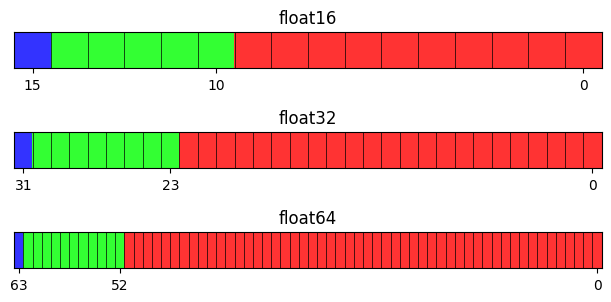

In [15]:
float16 = ("float16", 5, 10)
float32 = ("float32", 8, 23)
float64 = ("float64", 11, 52)

fig, axes = plt.subplots(3, 1, constrained_layout=True, figsize=(6,3))

for ax, floatn in zip(axes, (float16, float32, float64)):
    draw_float(ax, *floatn)

plt.show()

### Internal Representation

In [16]:
import numpy as np

for dtype in np.float16, np.float32, np.float64, np.float128:
    print(np.finfo(dtype))

Machine parameters for float16
---------------------------------------------------------------
precision =   3   resolution = 1.00040e-03
machep =    -10   eps =        9.76562e-04
negep =     -11   epsneg =     4.88281e-04
minexp =    -14   tiny =       6.10352e-05
maxexp =     16   max =        6.55040e+04
nexp =        5   min =        -max
smallest_normal = 6.10352e-05   smallest_subnormal = 5.96046e-08
---------------------------------------------------------------

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
smallest_normal = 1.1754944e-38   smallest_subnormal = 1.4012985e-45
---------------------------------------------------------------

Machine parameters for float64
---

#### Sign part
The sign part, $s$, is 0 for positive numbers and 1 for negative numbers.

#### Fractional part
The fractional part, $b$, actually encodes a 53-bit number, with a largest bit equal to 1,

\begin{equation}
    (1.b_{52}b_{51}\ldots b_{2}b_{1})_{2}
\end{equation}

Doubles therefore have 53-bit precision in binary, corresponding to 15--17 significant decimal digits.

The maximum relative rounding error when rounding a number to the nearest representable one (known as the machine epsilon) is therefore $\epsilon = 2^{−52}\approx2.22\times 10^{-16}$.

#### Exponent part
The range of the exponent string, $e$, is 0--2047.
There are several cases to consider.

 - $\mathbf{0 < e < 2047}$ the exponent is given by $e-1023$, *i.e.*, allowable exponents are integers on the range -1022--1023.
 
    In this case, the number encoded is *normal*: it has full precision.
    
    The rule for decoding the number is the expression,
    
    \begin{equation}
    (-1)^{s}\times 2^{e-1023} \times \left(1.b\right)_{2}
    \end{equation}
    
    The range of the positive normal numbers is thus $2^{-1022}$ to $2^{1023}$ (*tiny*), approximately $2.2250738585072014 \times 10^{-308}$ to $1.7976931348623157\times 10^{308}$ (*max*) in decimal.
    
    
 - $\mathbf{e=0; b\ne0}$ these are the **denormal** numbers.
    Denormal numbers fill the underflow gap around zero, ensuring that the difference between two distinct normal numbers is always non-zero.
    
    Denormal numbers are defined to less than 53 bits of precision.
    
    The expression to decode the string becomes,
    
    \begin{equation}
        (-1)^{s}\times 2^{-1022} \times \left(0.b\right)_{2}
    \end{equation}
    
 -  $\mathbf{e=0; b=0}$ the number evaluates to $\pm 0$
 -  $\mathbf{e=2047; b=0}$ the number evaluates to $\pm \infty$
 -  $\mathbf{e=2047; b\ne 0}$ the number evaluates to NaN (not a number)

Per these definitions, denormal numbers are linearly-spaced, but normal floating-point numbers come in linearly-spaced groups, providing an approximately logarithmically-spaced coverage of the number line.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from typing import Generator

def get_floats_in_order(dtype: np.dtype) -> Generator:
    finfo = np.finfo(dtype)
    x = dtype(0)
    while x < finfo.max:
        x = np.nextafter(x, finfo.max)
        yield x

In [19]:
dtype = np.float16

indices, numbers = np.array(
    list(
        enumerate(
            get_floats_in_order(dtype)
        )
    )
).T

differences = numbers[1:]-numbers[:-1]
boundary = np.finfo(dtype).smallest_normal

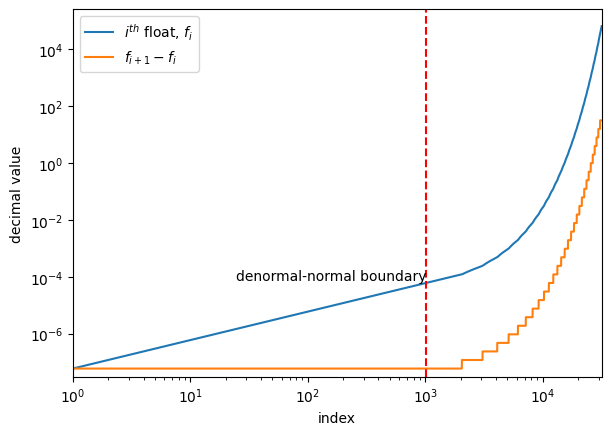

In [20]:
fig, ax = plt.subplots(1,1,figsize=(6, 6/2**0.5), constrained_layout=True)
ax.plot(indices+1, numbers, label='$i^{th}$ float, $f_{i}$')
ax.plot(indices[1:], differences, label='$f_{i+1}-f_{i}$')
ax.legend()

ax.axvline(1024, color='r', linestyle='--')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1, indices.max())
ax.set_ylim(numbers.min()/2, None)
ax.set_xlabel("index")
ax.set_ylabel("decimal value")

ax.text(
    1024, boundary,
    "denormal-normal boundary",
    ha='right',
    va='bottom'
);

## Representation Error and Truncation
Among many others, the decimal fraction $0.1$ has no finite binary expansion, and as such cannot be represented exactly, and must be truncated in order to be stored; this is a source of representation error.

An input value like $0.1$ is converted to the closest binary fraction that fits into the target type.

If the target is a double, that means finding the 53-bit integer $J$ and exponent $N$ such that $1/10 \approx J/2^{N}$, or, rearranging, $J \approx 2^{N}/10$.

Noticing that $8 < 10 < 16$,

\begin{equation}
2^{52} = 2^{N-4} < 2^{N}/10 < 2^{N-3} = 2^{53}
\end{equation}

so $N=56$ is the only value for $N$ leaving $J$ with exactly 53 bits.

Rounding $2^{56}/10$ to the nearest integer gives

\begin{equation}
    J = 7205759403792794
\end{equation}

As such, the best representation of $0.1$ in double precision is given by the fraction

\begin{equation}
    \frac{7205759403792794}{2^{56}} .
\end{equation}

In [21]:
7205759403792794 / 2**56

0.1

In Python, we can find the fractional representation of any float using the `to_integer_ratio` method of the `float` type, and the exact decimal value of the stored binary fraction using the `from_float` class method of the `Decimal` class.

In [22]:
x = 0.1
x.as_integer_ratio()

(3602879701896397, 36028797018963968)

In [23]:
from decimal import Decimal

Decimal.from_float(0.1)

Decimal('0.1000000000000000055511151231257827021181583404541015625')

Finally, encoded as a double precision value,
\begin{equation}
    0.1 \mapsto (0)(01111111011)(1001100110011001100110011001100110011001100110011010)_{2} .
\end{equation}

In [24]:
s = 0b0
e = 0b01111111011
b = 0b1001100110011001100110011001100110011001100110011010
(-1)**(s) * 2**(e - 1023) * (1 + 2**-52*b)

0.1

### Example: `1e10 - 1e10 + 1e-10 != 1e10 + 1e-10 - 1e10` ??

In [25]:
numbers_0 = (1e10, -1e10, 1e-10)
numbers_1 = (1e10, 1e-10, -1e10)
sum(numbers_0), sum(numbers_1)

(1e-10, 0.0)

To give a full-precision sum of the `1e10` and `1e-10` would require 21 decimal places of precision---more than can fit into the default 64-bit float.

The solution? Discard the least significant bits, which, in this case, is the entire right summand!

The `math` library provides the function `fsum` which avoids this problem by keeping track of intermediate values.

In [26]:
from math import fsum

fsum(numbers_0), fsum(numbers_1)

(1e-10, 1e-10)

### Example: `0.1 + 0.1 + 0.1 != 0.3` ??

In [27]:
0.1 + 0.1 + 0.1, 0.3

(0.30000000000000004, 0.3)

Inputs that have no exact representations as binary fractions will be represented as a closest approximation.

0.1 and 0.3 are two such inputs.

The reason for the above behaviour is that three times the best approximation for 0.1 is not the best approximation for 0.3.

In [28]:

a = 0.1 + 0.1 + 0.1
b = 0.3

a.as_integer_ratio(), b.as_integer_ratio()

((1351079888211149, 4503599627370496), (5404319552844595, 18014398509481984))

In [29]:
from decimal import Decimal

a = Decimal.from_float(0.1 + 0.1 + 0.1)
b = Decimal.from_float(0.3)
exact = Decimal(3)/10
exact - a, exact - b

(Decimal('-4.440892098500626161694526672E-17'),
 Decimal('1.110223024625156540423631668E-17'))

### Catastrophic Cancellation
Catastrophic cancellation is the phenomenon that subtracting good approximations to two nearby numbers may yield a very bad approximation to the difference of the original numbers.

Catastrophic cancellation can occur whenever approximations are made, such as with the approximate representation of the number line provided by floating point numbers.

Take as a simple example the discriminant of the quadratic equation,

\begin{equation}
    a x^{2} + b x + c = 0 \to x_{1,2} = \frac{-b\pm\sqrt{b^{2}-4ac}}{2a}
\end{equation}

If $|4ac/b^{2}| < \epsilon \approx 10^{-16}$, the one of the roots $x_{1,2}$ will suffer from catastrophic cancellation as its numerator will evaluate to $0$.

Any further computation that relies on the reciprocal the root will cause an exception, but worse would be for the cancellation to go unnoticed and propagate unhindered.



In [30]:
from math import sqrt


class Quadratic:
    def __init__(self, a, b, c):
        self.coeffs = (a, b, c)

    def __call__(self, x):
        a, b, c = self.coeffs
        return a * x * x + b * x + c
    
    def discriminant(self):
        a, b, c = self.coeffs
        root = sqrt(b * b - 4 * a * c)
        return (-b + root) / 2 / a, (-b - root) / 2 / a

    
quadratic = Quadratic(
    a = 1.0,
    b = 1e6,
    c = 1.0
)

for root in quadratic.discriminant():
    print(root, quadratic(root))

-1.00000761449337e-06 -7.614492369967252e-06
-999999.999999 0.0


The solution here is to rewrite one of the roots as a function of the other.

Noticing that the product of the roots is always $x_{1}x_{2}=c/a$, we can evaluate the non-pathological root, say, $x_{1}$, and then compute the other as $x_{2}=c/ax_{1}$.

In [31]:
from math import sqrt


class Quadratic:
    def __init__(self, a, b, c):
        self.coeffs = (a, b, c)

    def __call__(self, x):
        a, b, c = self.coeffs
        return a * x * x + b * x + c
    
    def discriminant(self):
        a, b, c = self.coeffs
        root = sqrt(b * b - 4 * a * c)
        return (-b + root) / 2 / a, (-b - root) / 2 / a
    
    def good_discriminant(self):
        a, b, c = self.coeffs
        root = sqrt(b * b - 4 * a * c)
        x1 = (-b - np.copysign(root, b)) / 2 / a
        x2 = c / a / x1
        return x1, x2

    
quadratic = Quadratic(
    a = 1.0,
    b = 1e6,
    c = 1.0
)

for root in quadratic.good_discriminant():
    print(root, quadratic(root))

-999999.999999 0.0
-1.000000000001e-06 0.0


### Exercise: Evaluating Functions
Rewrite the following expressions so that they can be safely evaluated in the given limit.

For small $h$,
\begin{equation}
    \tag{eq:efunc1}
    \sin\left(x+h\right)-\sin\left(x\right);
\end{equation}

for small $x$,
\begin{equation}
    \tag{eq:efunc2}
    \frac{1-\cos{x}}{\sin{x}};
\end{equation}

for large $N$,
\begin{equation}
    \tag{eq:efunc3}
    \int_{N}^{N+1}\frac{\mathrm{d}x}{1+x^{2}};
\end{equation}

for small $x$,
\begin{equation}
    \tag{eq:efunc4}
    \exp{x}-1;
\end{equation}

for large $N$,
\begin{equation}
    \tag{eq:efunc5}
    \int_{N}^{N+1}\mathrm{d}x\log\left(1+x\right).
\end{equation}

## Condition Number
The condition number, $\kappa\left(f,x\right)$, of a function $f\left(x\right)$ quantifies the **maximum** relative rate of change of a function with respect to changes in its arguments.

Functions with a low condition number are said to be well-conditioned, and those with a high condition number, ill-conditioned.

The outputs of well-conditioned functions are less sensitive to small changes to their inputs arising from, *e.g.*, measurement error or approximation errors.

Ill-conditioned functions, by contrast, may have outputs that vary strongly on small changes to their inputs, inducing errors in the output disproportionate to those in the input.

Mathematically, the condition number of a function $f\left(x\right)$ is given by,

\begin{equation}
    \kappa\left(f, x\right) = 
    \lim_{\epsilon \to 0}\sup_{\left\lVert\delta x\right\rVert \le \epsilon}
    \left. \frac{\left\lVert\delta f\left(x\right)\right\rVert}
    {\left\lVert f\left(x\right)\right\rVert} \middle/
    \frac{\left\lVert\delta{x}\right\rVert}{\left\lVert x\right\rVert} \right. .
\end{equation}

For differentiable functions of one variable, this expression simplifies to,

\begin{equation}
    \kappa\left(f, x\right) = \left\lvert\frac{x f'\left(x\right)} {f\left(x\right)}\right\rvert,
\label{eq:kappa}
\end{equation}

which the keen-eyed will recognise as the logarithmic derivative of $f$ divided by the logarithmic derivative of $x$,

\begin{equation}
    \kappa\left(f,x\right) =\left\lvert\left.
    \frac{\mathrm{d}}{\mathrm{d}x}\log{f}\middle/\frac{\mathrm{d}}{\mathrm{d}x}\log{x}
    \right.\right\rvert.
\label{eq:kappamulti}
\end{equation}

The logarithm of the condition number gives an approximate indication of how many digits of accuracy will be lost in addition to those lost through imprecision in approximation.

For functions of many variables we can write,

\begin{equation}
    \frac{\left\lVert J\left(\mathbf{x}\right)\right\rVert}{\left\lVert f\left(\mathbf{x}\right)\right\rVert /\left\lVert \mathbf{x}\right\rVert},
\end{equation}

where $J\left(\mathbf{x}\right)$ denotes the Jacobian matrix of partial derivatives of $f$ at $\mathbf{x}$.

 Notice that this expresses the relative rate of change of a function with respect to the relative rate of change of $\mathbf{x}$, the norm of a vector containing its arguments, not just the relative rate of change of an individual argument.

### Elementary Functions

$\mathrm{norm}$ | $\ell_{1}$ | $\ell_{2}$ | $\ell_{\infty}$
----|----|----|----
$\kappa\left(+,x,y\right)$ | $2\frac{\lvert x\rvert+\lvert y\rvert}{\lvert x+y\rvert}$ | $\frac{\sqrt{2\left(x^{2}+y^{2}\right)}}{\lvert x+y\rvert}$ | $\max\left(\lvert \frac{x}{x+y}\rvert,\lvert \frac{x}{x+y}\rvert\right)$
$\kappa\left(\times,x,y\right)$ | $\lvert x/y\rvert+\lvert y/x\rvert+2$ | $\lvert x/y\rvert+\lvert y/x\rvert$ | $\max\left(\lvert x/y\rvert,\lvert y/x\rvert\right)$

We will now apply these results to some elementary functions.
In the case of scalar multiplication, $f\left(x\right)=a x$, the condition number is,

\begin{equation}
    \begin{split}
        \kappa\left(f, x\right)
        &= \left\lvert\frac{x \cdot f'\left(x\right)}{f\left(x\right)}\right\rvert \\
        &= \frac{x \cdot a}{a x} \\
        &= 1,
    \end{split}
\end{equation}

which suggests that scalar multiplication is always well-conditioned, so the accuracy of the output $f\left(x\right)$ will be the same as the accuracy in the input, $x$.

Multiplication of two variables, $f\left(x, y\right)=x y$, has distinctly different characteristics,

\begin{equation}
    \begin{split}
        \kappa\left(f, x, y\right)
        &= \frac{\left\lVert(\frac{\partial f}{\partial x},\frac{\partial f}{\partial y})\right\rVert}
        {\left\lVert f\left(x,y\right)\right\rVert/
        \left\lVert(x,y)\right\rVert} \\
        &= \frac{\left\Vert(x, y)\right\rVert^{2}}{\left\lvert\left(x \cdot y\right)\right\rvert}
    \end{split}
\end{equation}

In general, the condition number will differ for different choices of norm.

Multiplication of two numbers $x,y$ is well-conditioned ($\kappa$ is close to $1$) when the numbers are similar in magnitude, but becomes ill-conditioned when either $x\gg y$ or $y \gg x$.

It is important to note that the condition number does not tell us what the error in $f$ will be; it simply gives an upper bound on the ratio of the relative error in $f$ and the relative error in $\mathbf{x}$.

In the case of multiplying two numbers:
take $\mathbf{x}=\left(a,b\right)$ and $\mathbf{\delta x}=\left(\delta a, \delta b\right)$.

Consider the case $\left(a,b\right)=\left(1, 10000\right); \left\lVert \delta x\right\rVert=1$.

The error in $x$ could be mostly in $a$, mostly in $b$, or spread between the two.

In [32]:
a, b, dx = 1.0, 10000.0, 1.0
product = a * b

If the error is entirely in $b$, then the error in the product is $1$; *i.e.*, the same as in the error in the input.

In [33]:
a * (b + dx) - product

1.0

If, however, the error is entirely in $a$, the error in the product is $10000$, four orders of magnitude greater than the error in the input!

In [34]:
(a + dx) * b - product

10000.0

This magnification of error is equal to the condition number of $f$ at $\mathbf{x}$ (using the $\ell_{\infty}$ norm).

In [35]:
max(abs(a/b), abs(b/a))

10000.0